<a href="https://colab.research.google.com/github/a-ma-n/ISTE_Task2/blob/main/pokemon_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## start

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random
import string

In [ ]:
batch_size = 15
img_height = 100
img_width = 100

In [ ]:
directory = "/content/drive/MyDrive/Pokemon_dataset"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=32,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

class_names = train_ds.class_names
print(class_names)
print(len(class_names))

Found 10677 files belonging to 149 classes.
Using 8542 files for training.
['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew'

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(15, 100, 100, 3)
(15,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 149
batch_size = 15
img_height = 100
img_width = 100


In [ ]:
model = Sequential([
  keras.Input(shape=(100, 100, 3)),
  layers.experimental.preprocessing.Rescaling(1./255
                                              # , input_shape=(img_height, img_width, 3)
                                              ),
  layers.Conv2D(16, 3, activation='relu'),
#  layers.MaxPooling2D(),
  layers.Conv2D(32, 7, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 5, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 7, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        25120     
_________________________________________________________________
batch_normalization (BatchNo (None, 92, 92, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## train

In [ ]:
history = model.fit(train_ds, epochs=80, batch_size=32, verbose=1)

Epoch 1/20


In [ ]:
acc = model.history['accuracy']
loss = model.history['loss']
epochs = 80
epochs_range = range(epochs)

plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

TypeError: ignored

In [ ]:
model.save("90percacc")

In [ ]:
model1=

## Saving the model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/91acc')

In [ ]:
import cv2

In [ ]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [ ]:
class_names=['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Pinsir', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Primeape', 'Psyduck', 'Raichu', 'Rapidash', 'Raticate', 'Rattata', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax', 'Spearow', 'Squirtle', 'Starmie', 'Staryu', 'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos', 'Zubat']

In [ ]:
for i in model:
  print(i)

TypeError: ignored

In [ ]:
def pred_img(file_name):
    img = cv2.imread(file_name)
    img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
    # img.shape
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    # img = img.reshape(-1, 100, 100, 3)
    # print(img.shape)
    pred = np.argmax(model(img))
    return class_names[pred]
    # print(f"it is a {class_names[pred]} with probability {model(img)[0][pred]*100}%")

(1, 100, 100, 3)
it is a Flareon with probability 82.78736114501953%


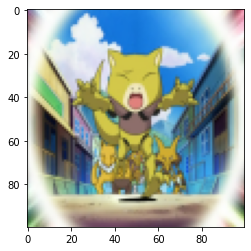

In [ ]:
pred_img('/content/drive/MyDrive/Pokemon_dataset/Abra/10a9f06ec6524c66b779ea80354f8519.jpg')